# HANK-SAM

**Table of contents**<a id='toc0_'></a>    
- 1. [Steady state](#toc1_)    
  - 1.1. [Policy functions](#toc1_1_)    
  - 1.2. [Distribution](#toc1_2_)    
  - 1.3. [Spending in unemployment](#toc1_3_)    
- 2. [Effect of government spending](#toc2_)    
  - 2.1. [Tests](#toc2_1_)    
  - 2.2. [Jacobians](#toc2_2_)    
  - 2.3. [Response](#toc2_3_)    
  - 2.4. [Outcomes](#toc2_4_)    
- 3. [Question I. Solution method](#toc3_)    
  - 3.1. [a) Unkowns and targets](#toc3_1_)    
  - 3.2. [b) Number of unknowns](#toc3_2_)    
  - 3.3. [c) Linearity](#toc3_3_)    
- 4. [Question 2: Fiscal multiplier](#toc4_)    
  - 4.1. [a) Crowding-out](#toc4_1_)    
    - 4.1.1. [Type decomposition](#toc4_1_1_)    
    - 4.1.2. [Variable decomposition](#toc4_1_2_)    
  - 4.2. [b) Tax response, $\omega$](#toc4_2_)    
  - 4.3. [c) Share of HtMs](#toc4_3_)    
  - 4.4. [d) Representative agent](#toc4_4_)    
- 5. [Unemployment duration](#toc5_)    
  - 5.1. [a) Steady state](#toc5_1_)    
  - 5.2. [b) Fiscal multiplier of extension](#toc5_2_)    
  - 5.3. [c) Fiscal multiplier of future extension](#toc5_3_)    
  - 5.4. [d) Fiscal multiplier of future extension cancelled ex post](#toc5_4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import scipy.optimize as optimize

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANKSAMModel import HANKSAMModelClass

In [2]:
def create_fig(figsize=(6,6/1.5)):
    
    fig = plt.figure(figsize=figsize,dpi=100)
    ax = fig.add_subplot(1,1,1)

    return fig,ax

def format_fig(fig,ax,ylabel='',T_max=48,legend=True):

    if legend: ax.legend(frameon=True)
    ax.set_xlabel('months')
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(T_max+1)[::12])
    ax.set_xlim([0,T_max]);
    
    fig.tight_layout()

## 1. <a id='toc1_'></a>[Steady state](#toc0_)

In [3]:
model = HANKSAMModelClass(name='baseline',par={'algoname':'baseline'})

In [4]:
par = model.par
ss = model.ss
path = model.path

In [5]:
model.find_ss(do_print=True)

par.A = 0.3680
par.kappa = 1.8883
ss.w = 0.7500
ss.delta = 0.0200
ss.lambda_u_s = 0.3000
ss.lambda_v = 0.5000
ss.theta = 0.6000
ss.u = 0.0625
ss.S = 0.0625
household problem in ss solved in 16.1 secs [4082 iterations]
household problem in ss simulated in 5.1 secs [1959 iterations]
ss.G = 0.4226
ss.clearing_Y = 0.0000
par.jump_G = 0.0042
steady state found in 22.0 secs


In [6]:
try:
    model.test_ss()
except:
    print('newer version of GEModelTools needed')

w              :       0.7500
TFP            :       1.0000
px             :       0.8333
delta          :       0.0200
Vj             :       3.7766
errors_Vj      :       0.0000
v              :       0.0375
S              :       0.0625
u              :       0.0625
theta          :       0.6000
lambda_v       :       0.5000
lambda_u_s     :       0.3000
errors_u       :       0.0000
errors_Vv      :       0.0000
pi             :       0.0000
errors_pi      :       0.0000
i              :       0.0017
div            :       0.2344
q              :      33.9797
r              :       0.0017
G              :       0.4226
U_UI_hh_guess  :       0.0551
Phi            :       0.0312
transfer       :      -0.2344
X              :       0.2194
taut           :       0.3000
tau            :       0.3000
taxes          :       0.2203
B              :       0.0161
u_bar          :       6.0000
A_hh           :       0.5482
C_hh           :       0.5149
U_ALL_hh       :       0.0625
U_UI_hh   

### 1.1. <a id='toc1_1_'></a>[Policy functions](#toc0_)

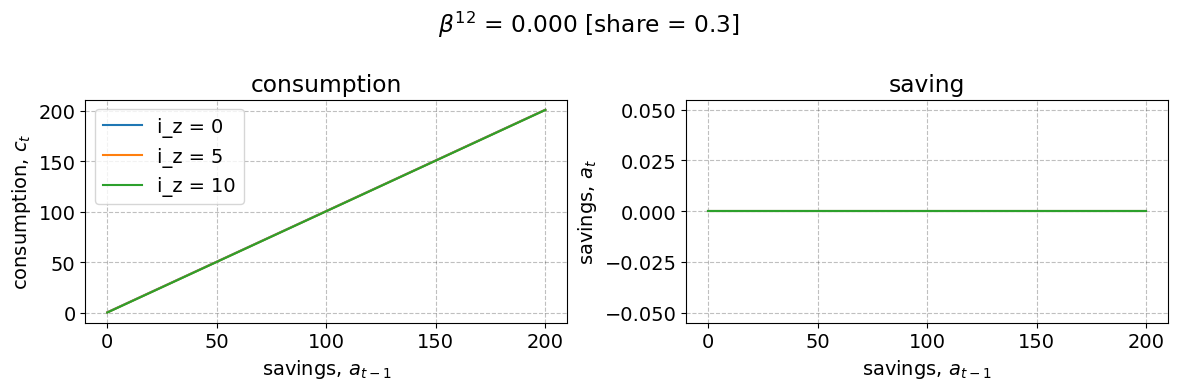

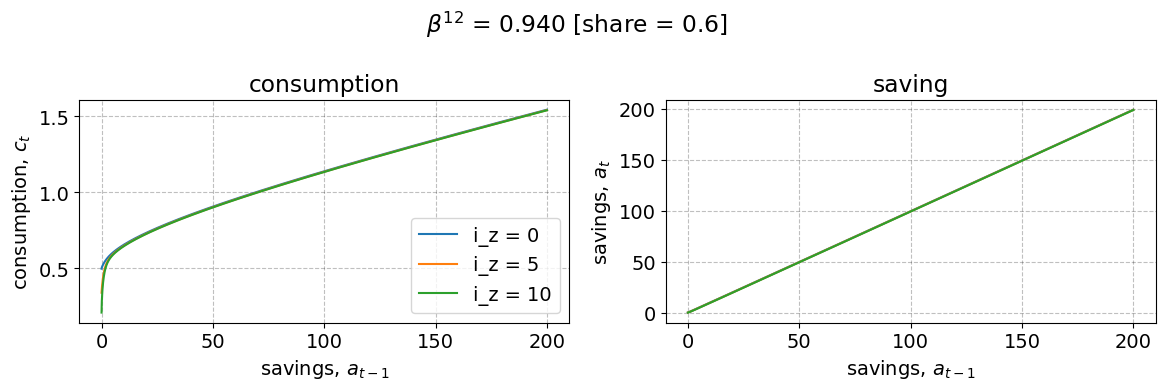

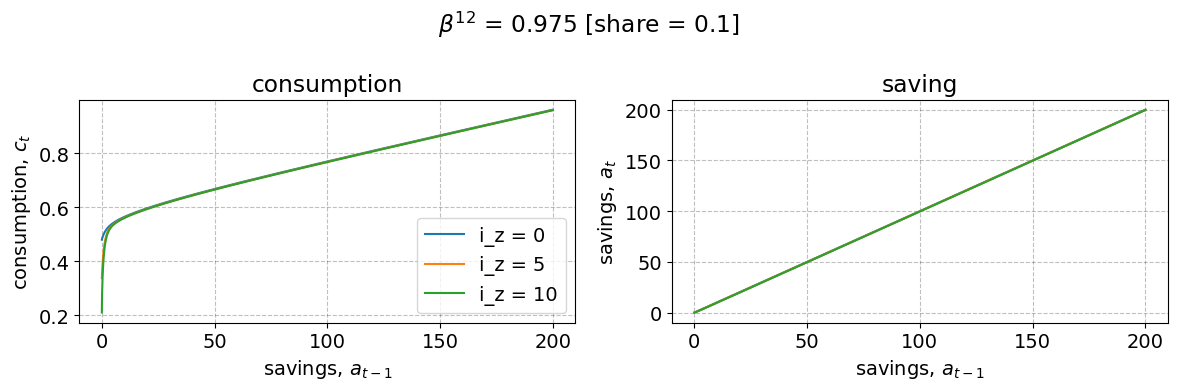

In [7]:
for i_fix in range(par.Nfix):

    fig = plt.figure(figsize=(12,4),dpi=100)
    a_max = 500

    # a. consumption
    I = par.a_grid < a_max

    ax = fig.add_subplot(1,2,1)
    ax.set_title(f'consumption')

    for i_z in [0,par.Nz//2,par.Nz-1]:
        ax.plot(par.a_grid[I],ss.c[i_fix,i_z,I],label=f'i_z = {i_z}')

    ax.legend(frameon=True)
    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('consumption, $c_t$')

    # b. saving
    I = par.a_grid < a_max

    ax = fig.add_subplot(1,2,2)
    ax.set_title(f'saving')

    for i_z in [0,par.Nz//2,par.Nz-1]:
        ax.plot(par.a_grid[I],ss.a[i_fix,i_z,I],label=f'i_z = {i_z}')

    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('savings, $a_{t}$')

    fig.suptitle(fr'$\beta^{{12}}$ = {par.beta_grid[i_fix]**12:.3f} [share = {par.beta_shares[i_fix]}]')
    fig.tight_layout()

### 1.2. <a id='toc1_2_'></a>[Distribution](#toc0_)

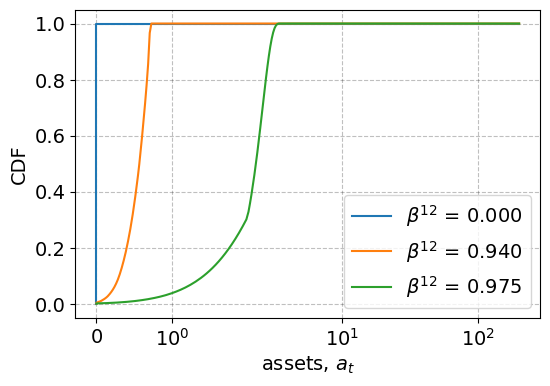

In [8]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

for i_fix in range(par.Nfix):
    y = np.insert(np.cumsum(np.sum(ss.D[i_fix],axis=0)),0,0.0)
    ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1],
            label=f'$\\beta^{{12}}$ = {par.beta_grid[i_fix]**12:.3f}')
        
ax.legend(frameon=True)
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')


### 1.3. <a id='toc1_3_'></a>[Spending in unemployment](#toc0_)

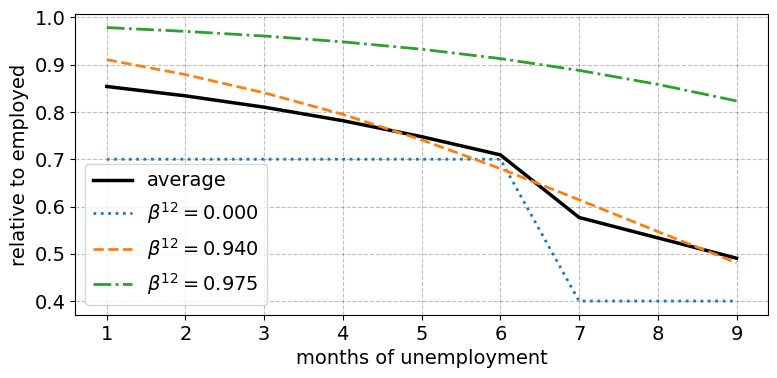

In [9]:
fig,ax = create_fig(figsize=(8,6/1.5))  

# baseline
C_e,C_u,C_u_dur = model.calc_Cs()
ax.plot(np.arange(1,par.Nu),C_u_dur[:-1]/C_e,ls='-',lw=2.5,color='black',label='average')

for i_fix,ls in zip(range(par.Nfix),[':','--','-.']):
    C_e,C_u,C_u_dur = model.calc_Cs(i_fix=i_fix)
    ax.plot(np.arange(1,par.Nu),C_u_dur[:-1]/C_e,lw=2,ls=ls,label=f'$\\beta^{{12}} = {par.beta_grid[i_fix]**12:.3f}$')

# details
ax.set_xticks(np.arange(1,par.Nu));
ax.set_xlabel('months of unemployment')
ax.set_ylabel('relative to employed')
ax.legend(frameon=True,ncol=1)

fig.tight_layout()

In [10]:
C_e,C_u,C_u_dur = model.calc_Cs()
C_drop_ss = (C_u/C_e-1)*100
C_drop_ex = (C_u_dur[6]-C_u_dur[5])/((1-ss.tau)*(par.phi_obar-par.phi_ubar)*ss.w)*100
print(f'{C_drop_ss = :.2f}')
print(f'{C_drop_ex = :.2f}')

C_drop_ss = -22.01
C_drop_ex = -43.90


## 2. <a id='toc2_'></a>[Effect of government spending](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Tests](#toc0_)

In [11]:
model.test_path()

shocks: G u_bar 
unknowns: px Vj v u S pi U_UI_hh_guess 

look at max(abs(path.VARNAME[:]-ss.VARNAME)):

 blocks.production
  w                0.0e+00
  TFP              0.0e+00
  delta            0.0e+00
  errors_Vj        0.0e+00 [target]
 blocks.labor_market
  theta            0.0e+00
  lambda_v         0.0e+00
  lambda_u_s       0.0e+00
  errors_u         0.0e+00 [target]
 blocks.entry
  errors_Vv        0.0e+00 [target]
 blocks.price_setters
  errors_pi        0.0e+00 [target]
 blocks.central_bank
  i                0.0e+00
 blocks.dividends
  div              0.0e+00
 blocks.financial_market
  q                0.0e+00
  r                2.2e-16
 blocks.government
  Phi              0.0e+00
  transfer         0.0e+00
  X                0.0e+00
  taut             0.0e+00
  tau              0.0e+00
  taxes            0.0e+00
  B                0.0e+00
 hh
  A_hh             7.9e-10
  C_hh             9.0e-12
  U_ALL_hh         1.3e-16
  U_UI_hh          1.2e-16
  C_HTM_hh         0.

### 2.2. <a id='toc2_2_'></a>[Jacobians](#toc0_)

In [12]:
model.compute_jacs(do_print=False,skip_shocks=True)

### 2.3. <a id='toc2_3_'></a>[Response](#toc0_)

In [13]:
model.find_transition_path(shocks=['G'],do_print=False,do_end_check=False)

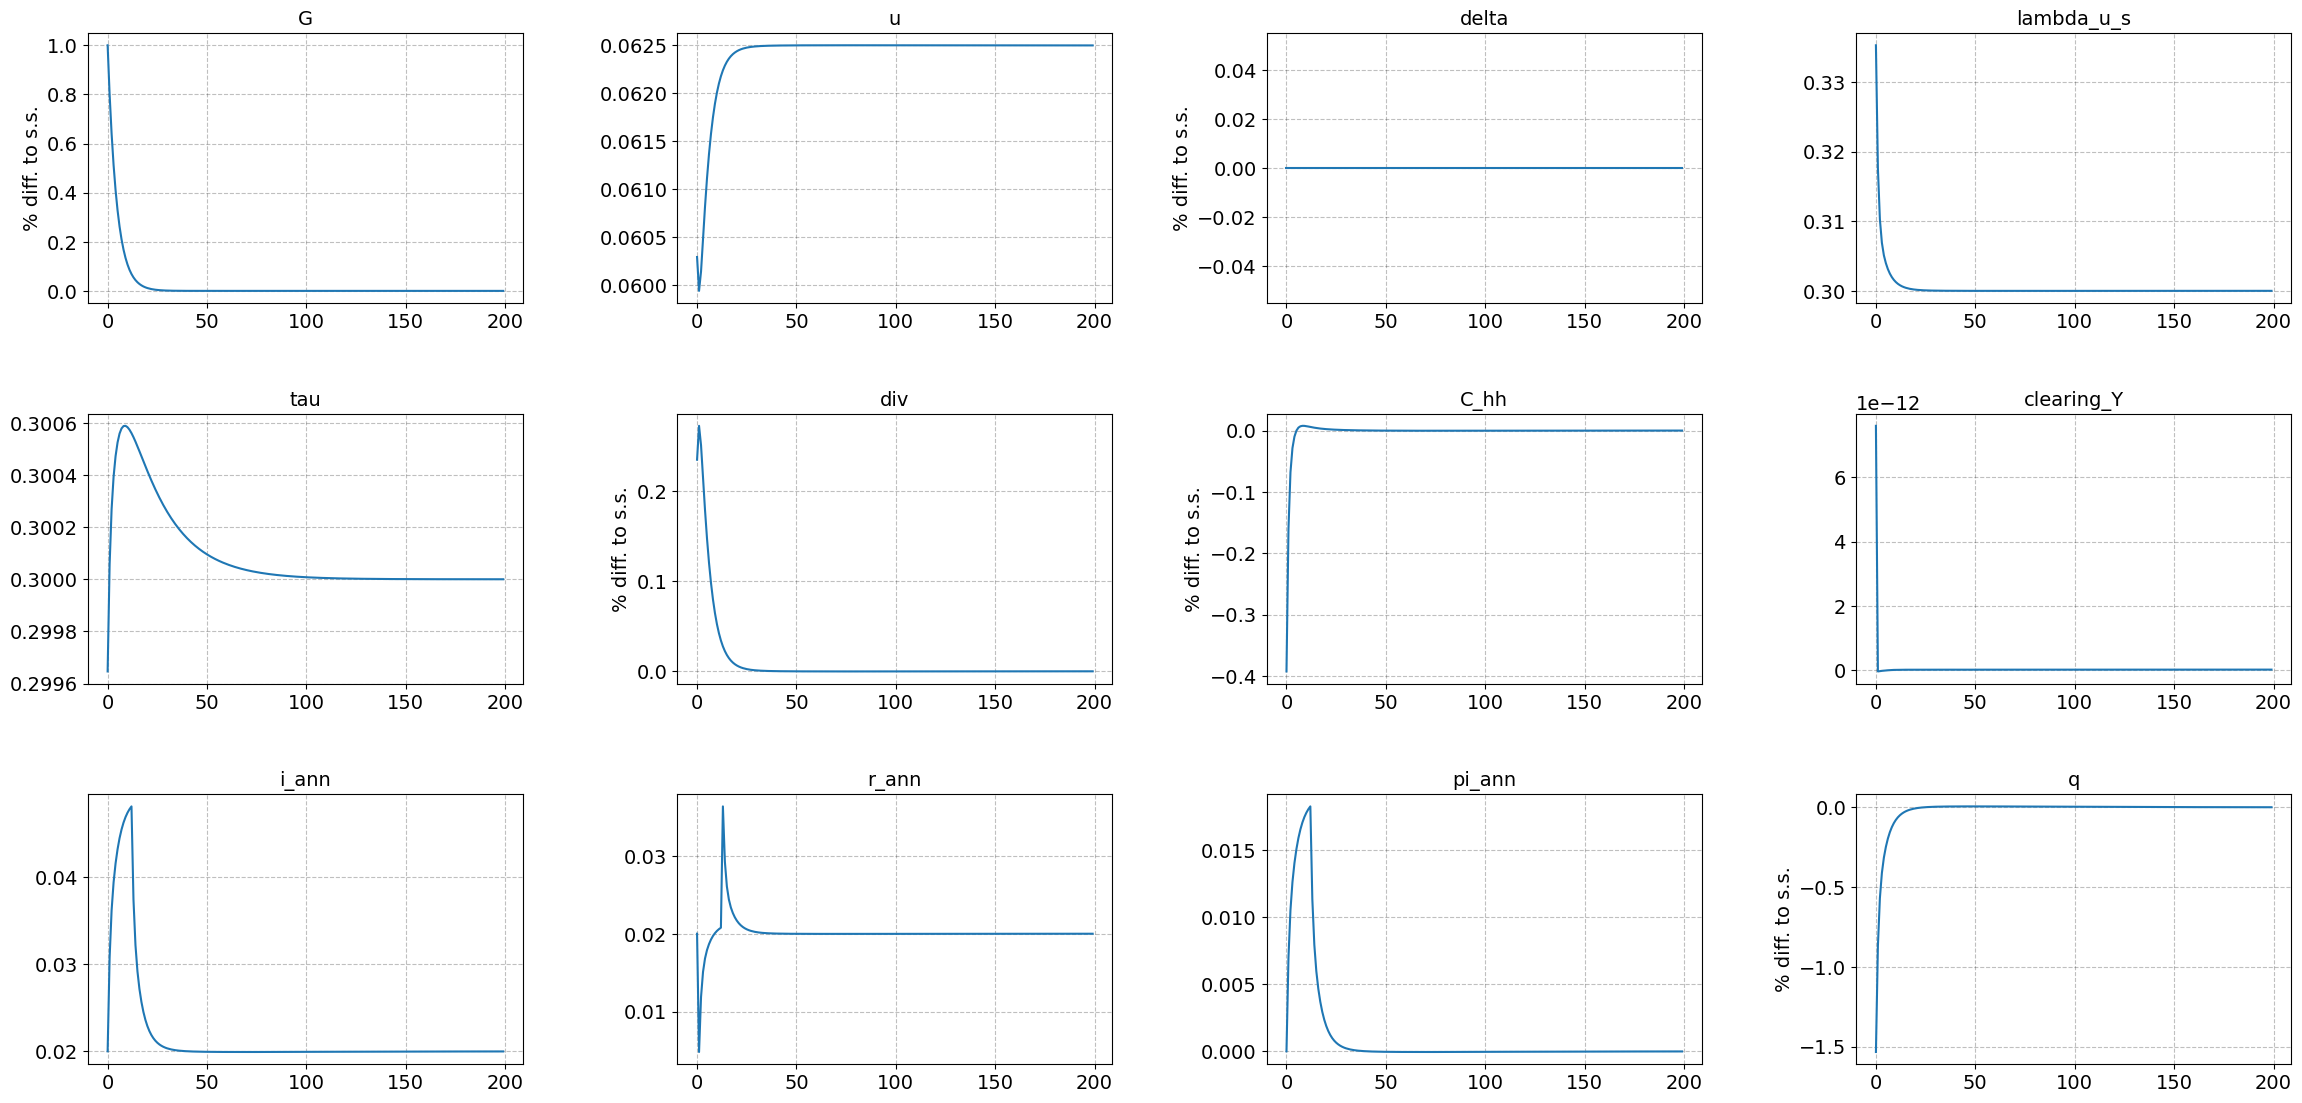

In [14]:
varnames = ['G','u','delta','lambda_u_s','tau','div','C_hh','clearing_Y','i_ann','r_ann','pi_ann','q']
lvl_value = ['u','lambda_u_s','tau','i_ann','r_ann','pi_ann','clearing_Y']
model.show_IRFs(varnames,lvl_value=lvl_value,T_max=200,do_shocks=False,do_targets=False)

**DELETE BELOW HERE**

### 2.4. <a id='toc2_4_'></a>[Outcomes](#toc0_)

In [15]:
model.calc_outcomes(do_print=True)

 qB  = 0.55
 M   = 1.27
 MPC[ 0] = 32.5
 MPC[ 1] = 2.2
 MPC[ 2] = 2.1
 MPC[12] = 1.5


## 3. <a id='toc3_'></a>[Question I. Solution method](#toc0_)

### 3.1. <a id='toc3_1_'></a>[a) Unkowns and targets](#toc0_)

In [16]:
# model.unkowns and model.targets
# we can leave out delta and w as variablse at all
# we can merge div and transfer

### 3.2. <a id='toc3_2_'></a>[b) Number of unknowns](#toc0_)

In [17]:
from HANKSAMModel import HANKSAMModelClass_alt
model_no_u = HANKSAMModelClass_alt()
model_no_u.find_ss(do_print=False)
model_no_u.compute_jacs()
model_no_u.find_transition_path(shocks=['G'],do_print=False,do_end_check=False)
model_no_u.calc_outcomes(do_print=True)

 qB  = 0.55
 M   = 1.27
 MPC[ 0] = 32.5
 MPC[ 1] = 2.2
 MPC[ 2] = 2.1
 MPC[12] = 1.5


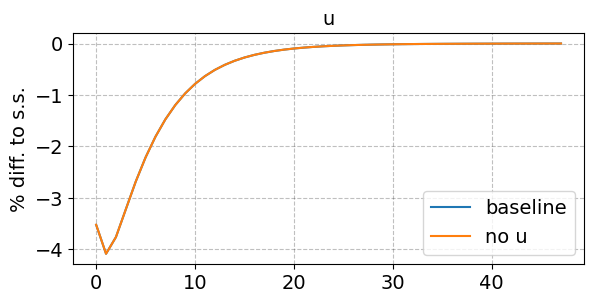

In [18]:
model.compare_IRFs([model,model_no_u],['baseline','no u'],['u'],
                   do_shocks=False,do_targets=False,T_max=48)

model.ss.u = 0.0625
model.ss.S = 0.0625


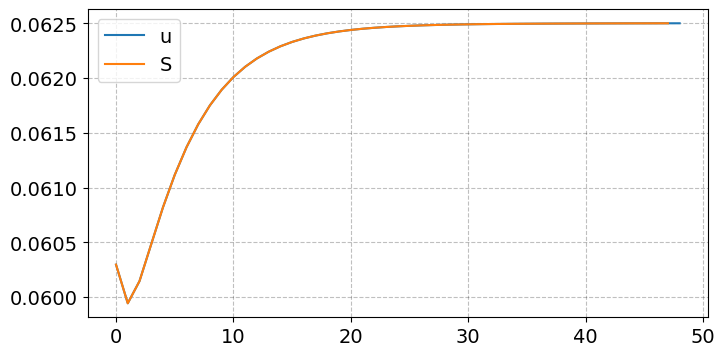

In [24]:
fig, ax = create_fig(figsize=(8,6/1.5))

print(f'{model.ss.u = :.4f}')
print(f'{model.ss.S = :.4f}')

ax.plot(path.u[:49],label='u')
ax.plot(path.S[1:49],label='S')
ax.legend(frameon=True)

### 3.3. <a id='toc3_3_'></a>[c) Linearity](#toc0_)

In [25]:
du = {}
du[model.par.jump_G] = model.path.u/model.ss.u-1
for fac in [0.5,2.0]:

    model_ = model.copy()
    model_.par.jump_G *= fac
    model_.find_transition_path(shocks=['G'],do_print=False,do_end_check=False)

    du[model_.par.jump_G] = model_.path.u/model_.ss.u-1

**Absolute:**

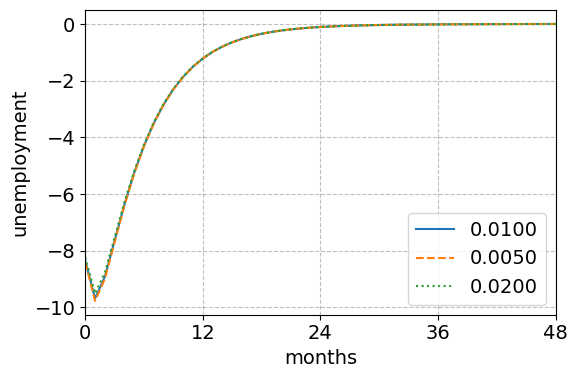

In [26]:
fig,ax = create_fig(figsize=(6,6/1.5))
for (k,v),ls in zip(du.items(),['-','--',':']):
    ax.plot(np.arange(par.T),v/k,ls=ls,label=f'{k/model.ss.G:.4f}')

format_fig(fig,ax,ylabel='unemployment',T_max=48,legend=True)

**Relative:**

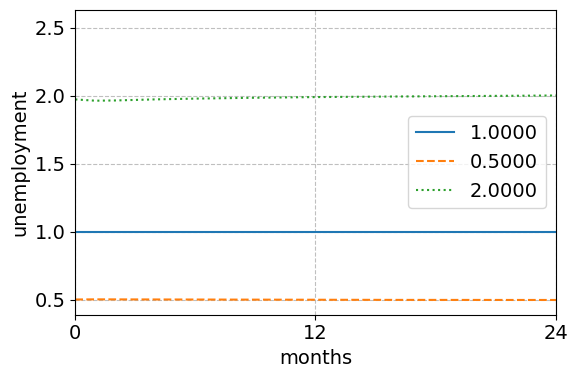

In [27]:
fig,ax = create_fig(figsize=(6,6/1.5))
for i,((k,v),ls) in enumerate(zip(du.items(),['-','--',':'])):
    if i == 0: 
        kbaseline = k
        vbaseline = v
    ax.plot(np.arange(par.T),v/vbaseline,ls=ls,label=f'{k/kbaseline:.4f}')

format_fig(fig,ax,ylabel='unemployment',T_max=24,legend=True)

In [28]:
model.compute_jacs(skip_hh=True)

In [29]:
print(f'{model.par.jump_G/model.ss.G = :.4f}')
model.find_IRFs(shocks=['G'],do_print=False)

model.par.jump_G/model.ss.G = 0.0100


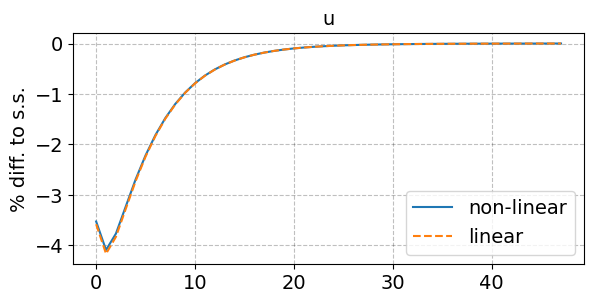

In [30]:
model.show_IRFs(['u'],T_max=48,do_shocks=False,do_targets=False,do_linear=True)

## 4. <a id='toc4_'></a>[Question 2: Fiscal multiplier](#toc0_)

### 4.1. <a id='toc4_1_'></a>[a) Crowding-out](#toc0_)

#### 4.1.1. <a id='toc4_1_1_'></a>[Type decomposition](#toc0_)

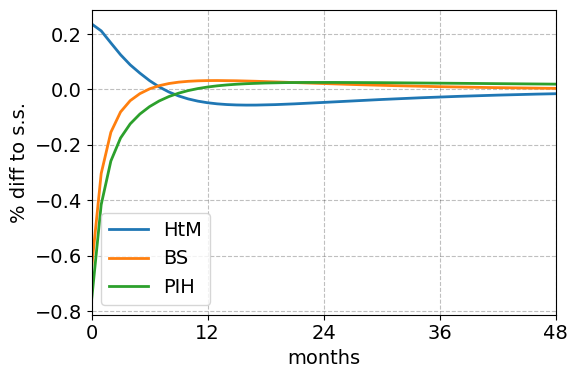

In [31]:
def plot_C_hh_types(model):

    hh_types = ['HtM','BS','PIH']

    fig,ax = create_fig(figsize=(6,6/1.5))

    for i,name in enumerate(hh_types):
        dC = model.path.__dict__[f'C_{name.upper()}_hh']/model.ss.__dict__[f'C_{name.upper()}_hh']
        ax.plot(np.arange(par.T),100*(dC-1),lw=2,label=name)

    ax.set_xlim(0,48)
    ax.legend()
    format_fig(fig,ax,ylabel='% diff to s.s.',T_max=48,legend=True)

plot_C_hh_types(model)

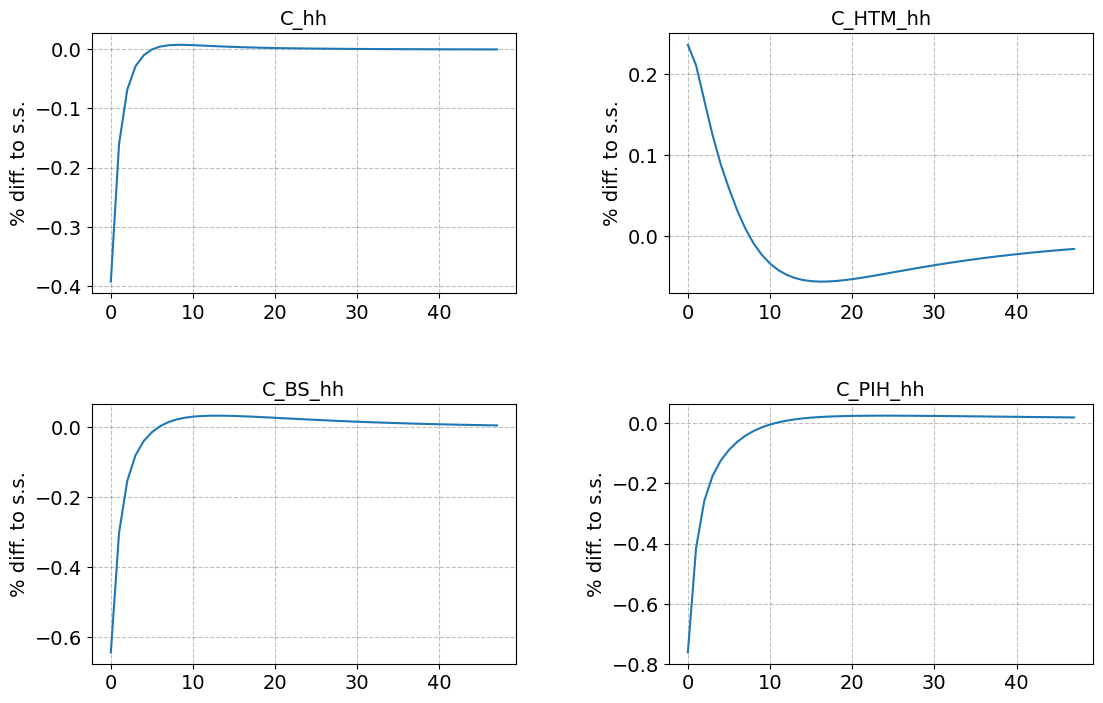

In [32]:
model.show_IRFs(['C_hh','C_HTM_hh','C_BS_hh','C_PIH_hh'],
                lvl_value=lvl_value,T_max=48,do_shocks=False,do_targets=False,ncols=2)

#### 4.1.2. <a id='toc4_1_2_'></a>[Variable decomposition](#toc0_)

In [33]:
def plot_C_hh_decomposition(model,i_beta=None,do_print=False,skip_all=False,ylim=None):
    
    T_max = 48

    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.set_title('consumption, $C_t^{hh}$')
                
    i_color = 0
    for use_inputs in ['all']+[[x] for x in ['r','tau','div','lambda_u_s']]:
        
        if 'all' in use_inputs and skip_all: continue
        
        # a. compute
        if do_print: print(use_inputs)
        if i_beta is None:
            ss_C_hh = ss.C_hh
            path_alt = model.decompose_hh_path(do_print=False,use_inputs=use_inputs)
        else:
            Dbeg = np.zeros_like(model.ss.Dbeg)
            Dbeg[i_beta] = model.ss.Dbeg[i_beta]
            Dbeg[i_beta] /= np.sum(Dbeg)

            D = np.zeros_like(model.ss.D)
            D[i_beta] = model.ss.D[i_beta]
            D[i_beta] /= np.sum(D)
            
            ss_C_hh = np.sum(ss.c*D)
            
            path_alt = model.decompose_hh_path(do_print=False,Dbeg=Dbeg,use_inputs=use_inputs)
            
        if do_print: print('')
        
        # b. plot
        if use_inputs is None:
            label = 'no inputs'
            ls = '--'
            color = 'black'
        elif use_inputs == 'all':
            label = 'all inputs'
            ls = '-'
            color = 'black'
        else:
            label = f'only effect from {use_inputs[0]}'
            if len(use_inputs) == 1 and use_inputs[0] in ['tau','div']:
                ls = '--'
            elif len(use_inputs) == 1 and use_inputs[0] in ['lambda_u_s']:
                ls = ':'
            else:
                ls = '-'
            color = colors[i_color]
            i_color += 1
            
        ax.plot((path_alt.C_hh[:T_max]/ss_C_hh-1)*100,ls=ls,color=color,label=label);

    if ylim is not None: ax.set_ylim(ylim)
    format_fig(fig,ax,ylabel='% diff to s.s.',T_max=T_max,legend=True)

    plt.show()

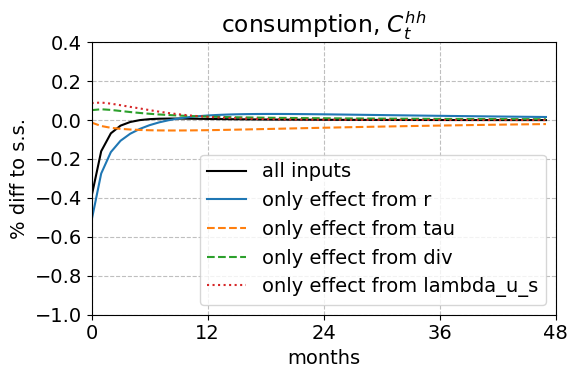

In [34]:
plot_C_hh_decomposition(model,ylim=[-1.0,0.4])

i_beta = 0


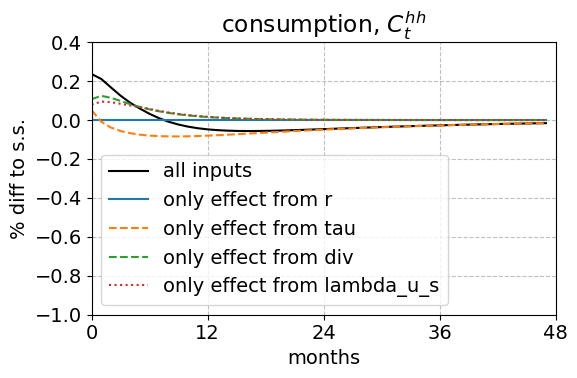

i_beta = 1


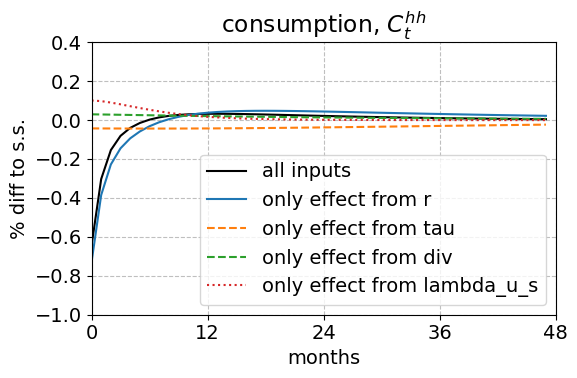

i_beta = 2


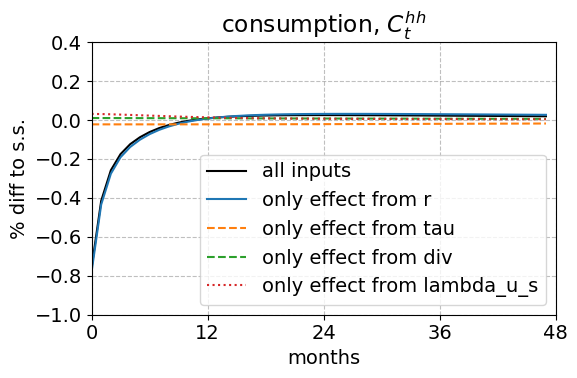

In [35]:
for i_beta in range(par.Nfix):
    print(f'{i_beta = }')
    plot_C_hh_decomposition(model,i_beta=i_beta,ylim=[-1.0,0.4])

### 4.2. <a id='toc4_2_'></a>[b) Tax response, $\omega$](#toc0_)

In [36]:
model_high_omega = model.copy()
model_high_omega.par.omega = 0.10
model_high_omega.run(find_ss=False,skip_hh=True)

 qB  = 0.55
 M   = 1.12
 MPC[ 0] = 32.5
 MPC[ 1] = 2.2
 MPC[ 2] = 2.1
 MPC[12] = 1.5


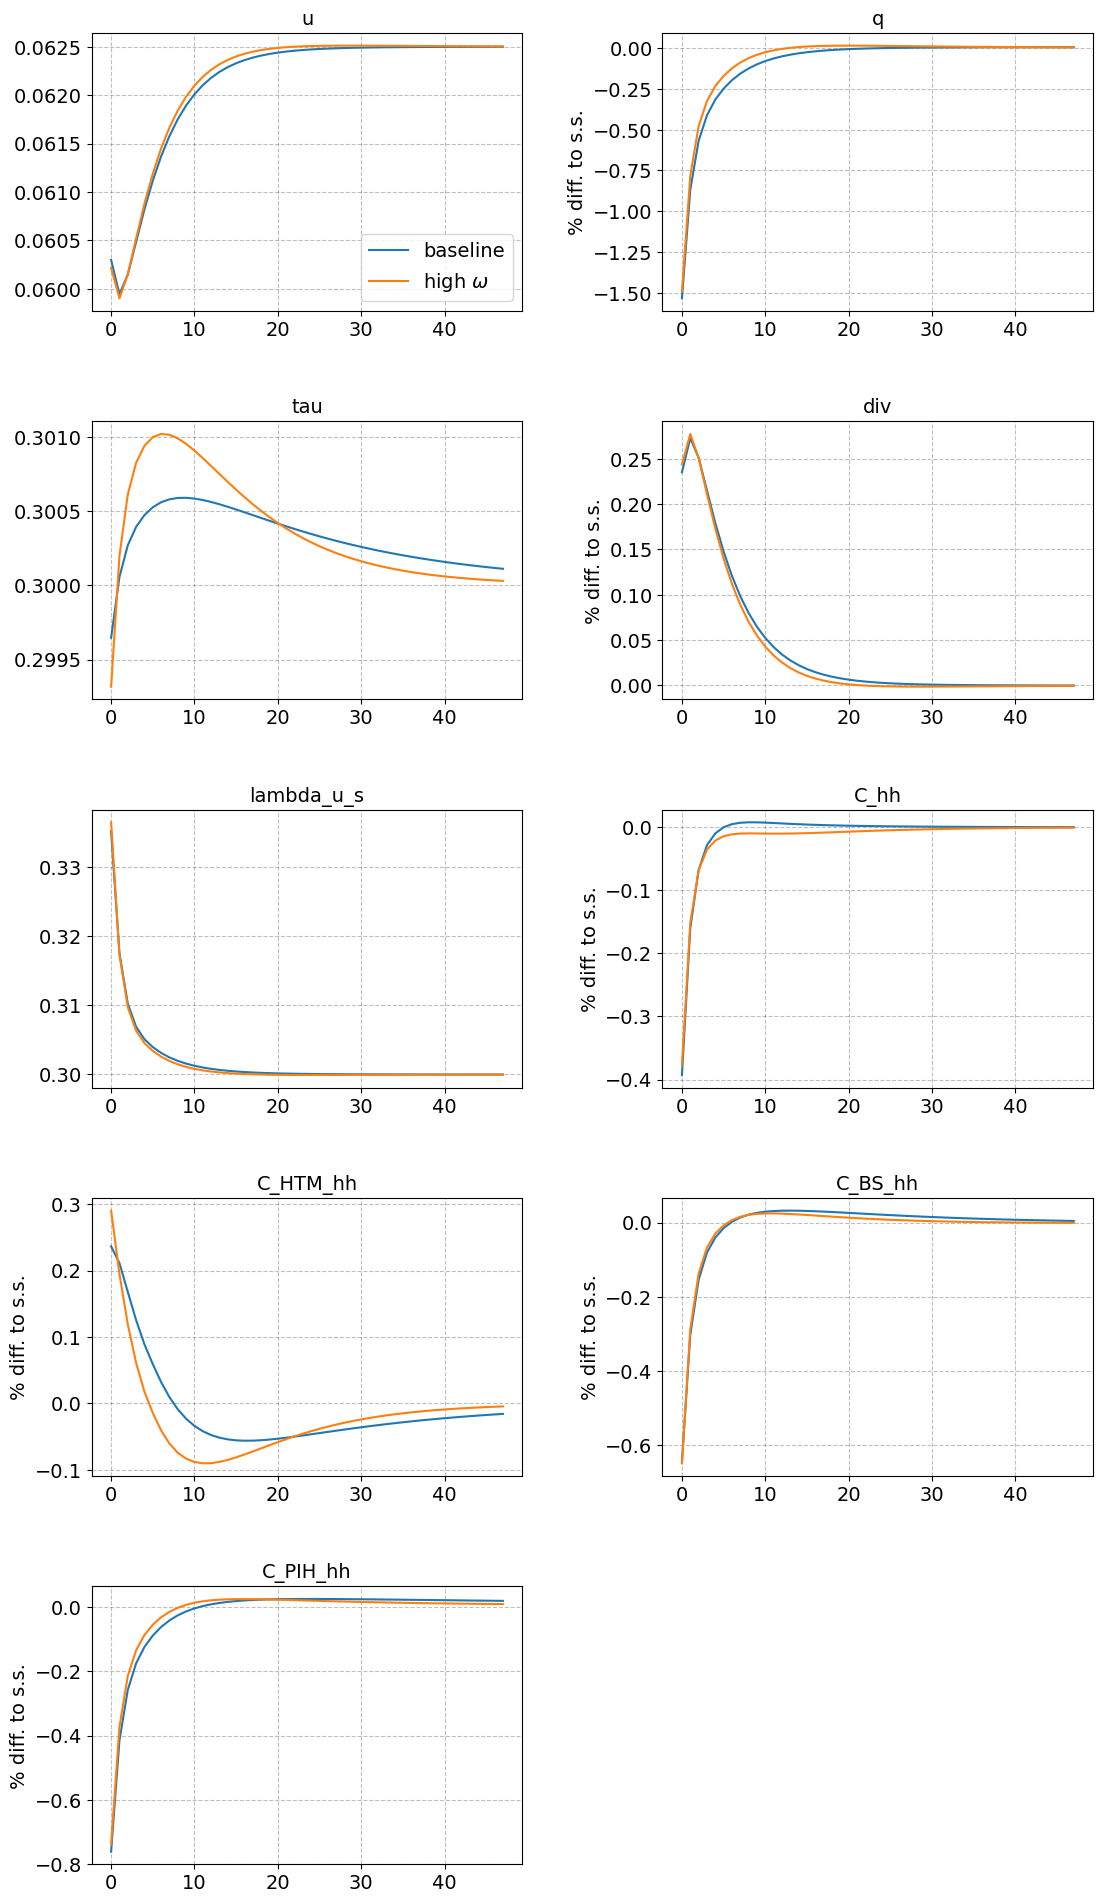

In [37]:
varnames = ['u','q','tau','div','lambda_u_s','C_hh','C_HTM_hh','C_BS_hh','C_PIH_hh']
model_high_omega.compare_IRFs(models=[model,model_high_omega],
                              labels=['baseline','high $\omega$'],
                              varnames=varnames,
                              lvl_value=lvl_value,T_max=48,do_shocks=False,do_targets=False,ncols=2)

### 4.3. <a id='toc4_3_'></a>[c) Share of HtMs](#toc0_)

In [38]:
model_more_HtM = model.copy()
model_more_HtM.par.HtM_share = 0.40
model_more_HtM.run()

 qB  = 0.49
 M   = 1.42
 MPC[ 0] = 42.1
 MPC[ 1] = 1.9
 MPC[ 2] = 1.8
 MPC[12] = 1.3


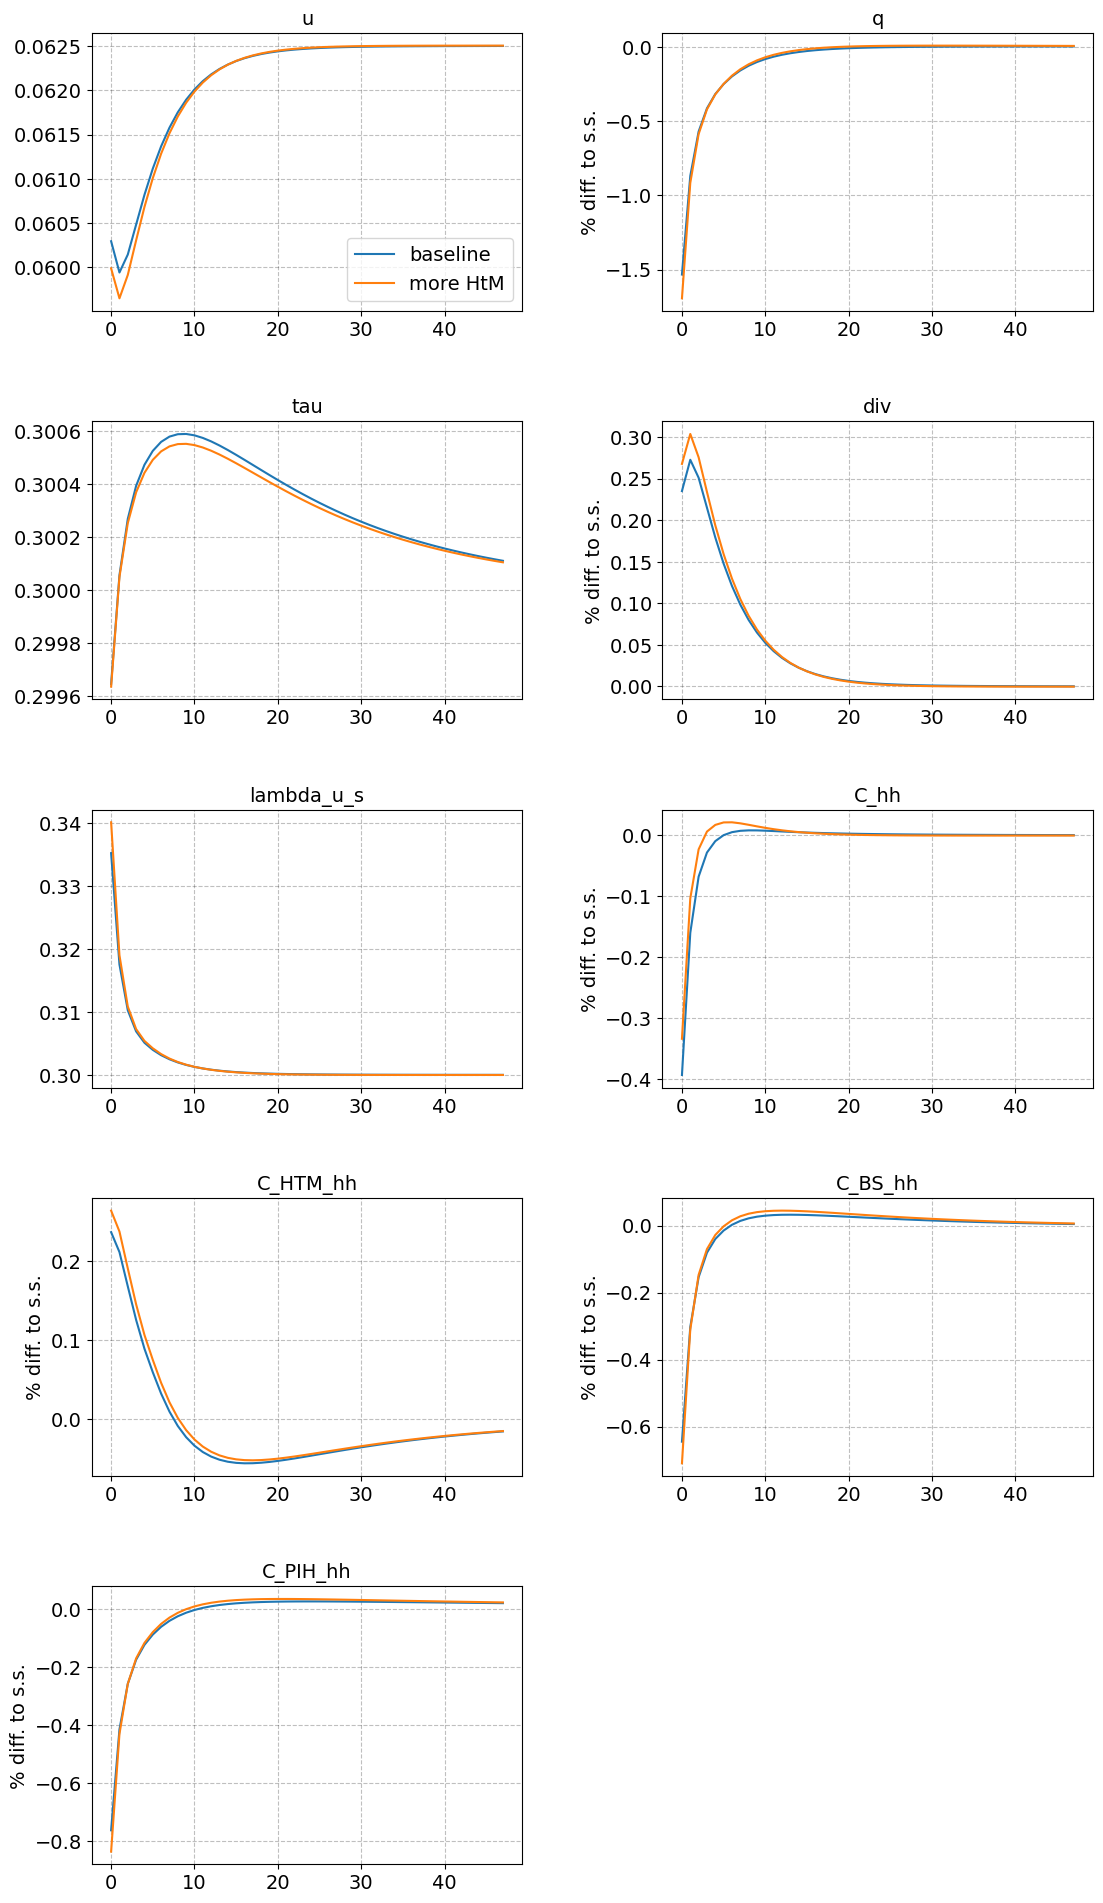

In [39]:
varnames = ['u','q','tau','div','lambda_u_s','C_hh','C_HTM_hh','C_BS_hh','C_PIH_hh']
model_more_HtM.compare_IRFs(models=[model,model_more_HtM],
                            labels=['baseline','more HtM'],
                            varnames=varnames,
                            lvl_value=lvl_value,T_max=48,do_shocks=False,do_targets=False,ncols=2)

### 4.4. <a id='toc4_4_'></a>[d) Representative agent](#toc0_)

In [40]:
model_RA = model.copy()
model_RA.par.RA = True
model_RA.run(skip_hh=True)

 qB  = 0.55
 M   = 0.73
 MPC[ 0] = 32.5
 MPC[ 1] = 2.2
 MPC[ 2] = 2.1
 MPC[12] = 1.5


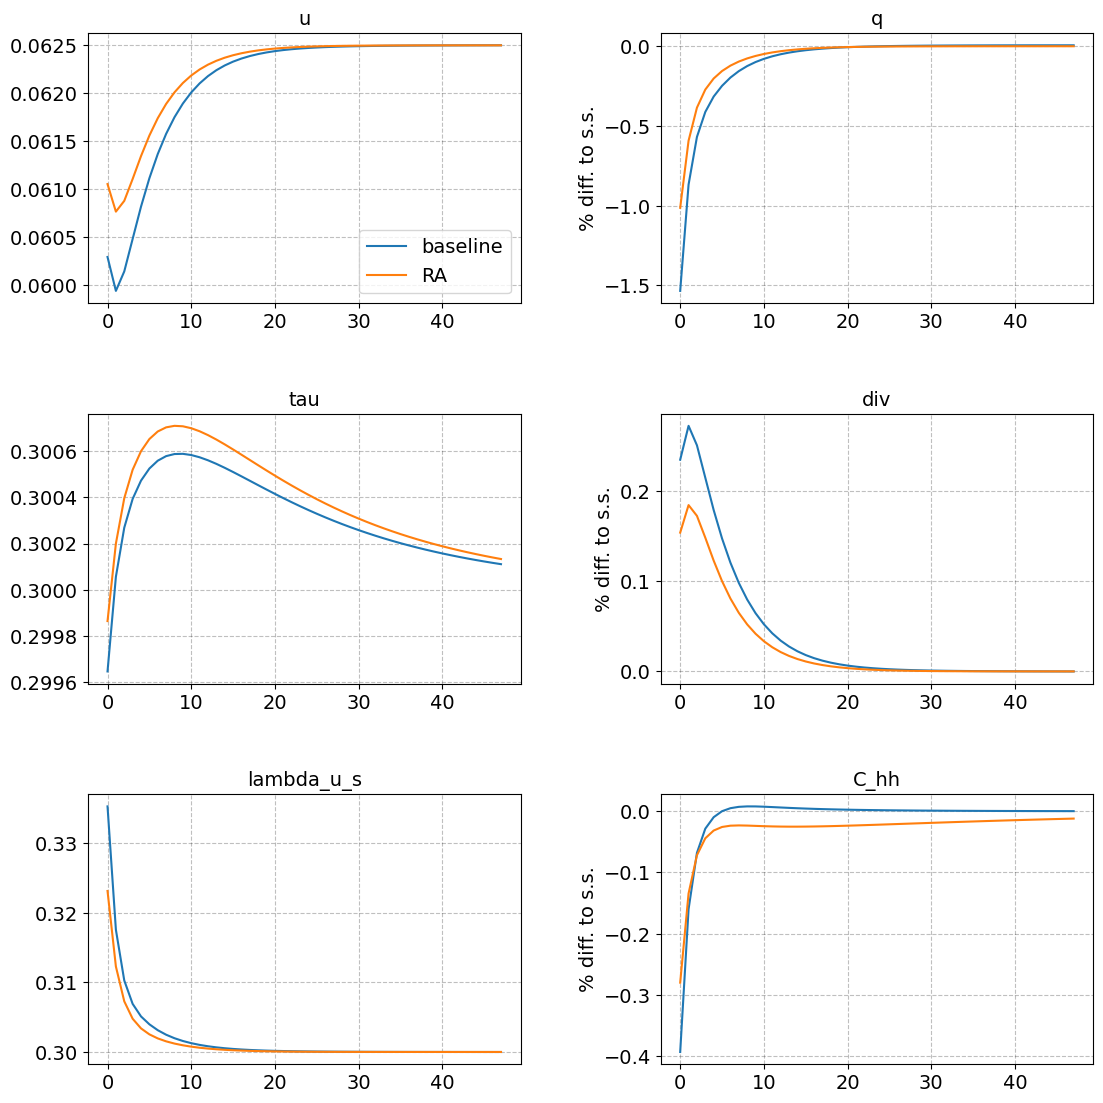

In [41]:
varnames = ['u','q','tau','div','lambda_u_s','C_hh']
model_RA.compare_IRFs(models=[model,model_RA],
                      labels=['baseline','RA'],
                      varnames=varnames,
                      lvl_value=lvl_value,T_max=48,do_shocks=False,do_targets=False,ncols=2)

## 5. <a id='toc5_'></a>[Unemployment insurance duration](#toc0_)

In [42]:
varnames_UI = ['u_bar','u','q','tau','div','lambda_u_s','C_hh','C_HTM_hh','C_BS_hh','C_PIH_hh']

### 5.1. <a id='toc5_1_'></a>[a) Steady state](#toc0_)

In [43]:
model_u_bar_ss = model.copy()
model_u_bar_ss.par.u_bar_ss += 1.0
model_u_bar_ss.run()

 qB  = 0.45
 M   = 1.32
 MPC[ 0] = 32.8
 MPC[ 1] = 2.4
 MPC[ 2] = 2.3
 MPC[12] = 1.5


In [44]:
model.calc_outcomes(do_print=True)

 qB  = 0.55
 M   = 1.27
 MPC[ 0] = 32.5
 MPC[ 1] = 2.2
 MPC[ 2] = 2.1
 MPC[12] = 1.5


1. Less self-insurance (lower qB and A_hh)
2. Higher MPC
3. Slightly higher multiplier

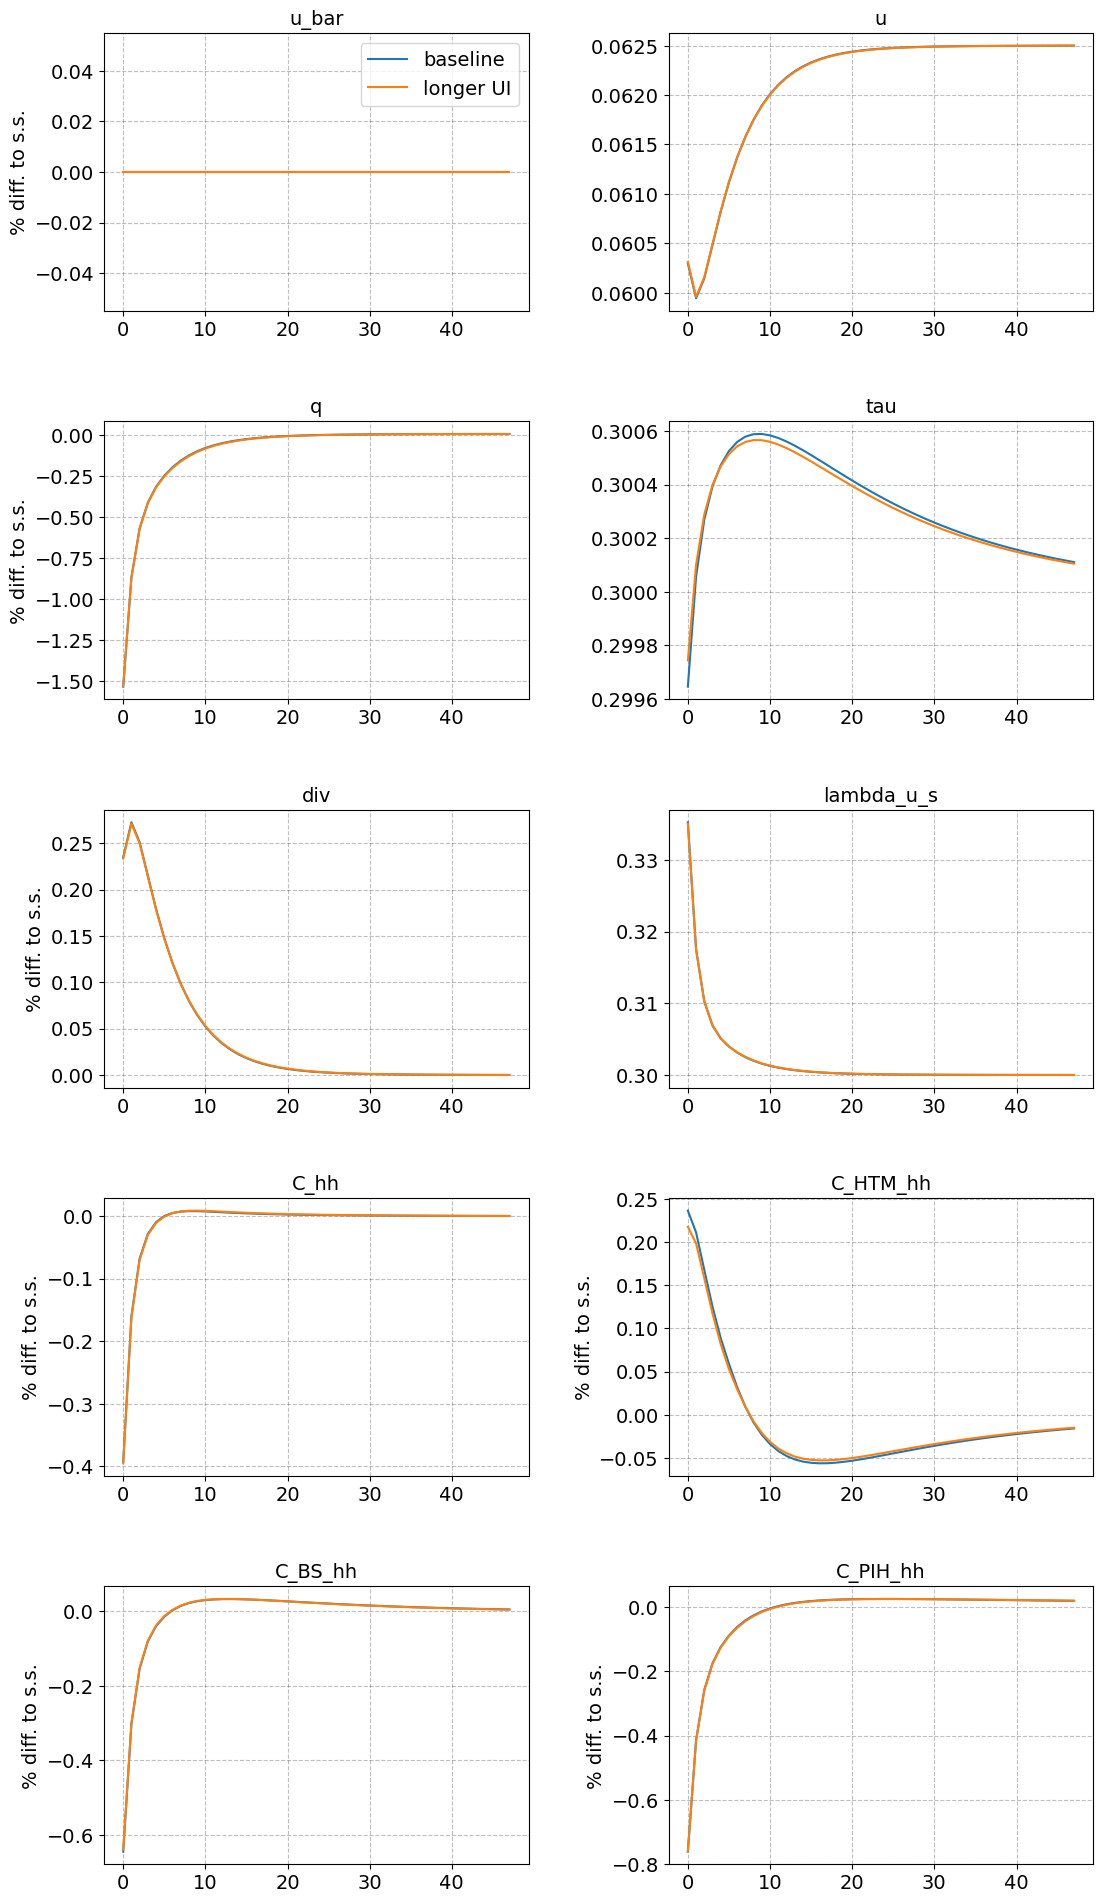

In [45]:
model_u_bar_ss.compare_IRFs(
    models=[model,model_u_bar_ss],
    labels=['baseline','longer UI'],
    varnames=varnames_UI,
    lvl_value=lvl_value,
    T_max=48,do_shocks=False,do_targets=False,ncols=2)

### 5.2. <a id='toc5_2_'></a>[b) Fiscal multiplier of UI extension](#toc0_)

In [46]:
model_u_bar = model.copy()

shocks = {'du_bar':np.zeros(par.T)}
shocks['du_bar'][:12] = np.ones(12)

model_u_bar.find_transition_path(shocks=shocks,do_end_check=False)
model_u_bar.calc_outcomes(do_print=True)

 qB  = 0.55
 M   = 1.48
 MPC[ 0] = 32.5
 MPC[ 1] = 2.2
 MPC[ 2] = 2.1
 MPC[12] = 1.5


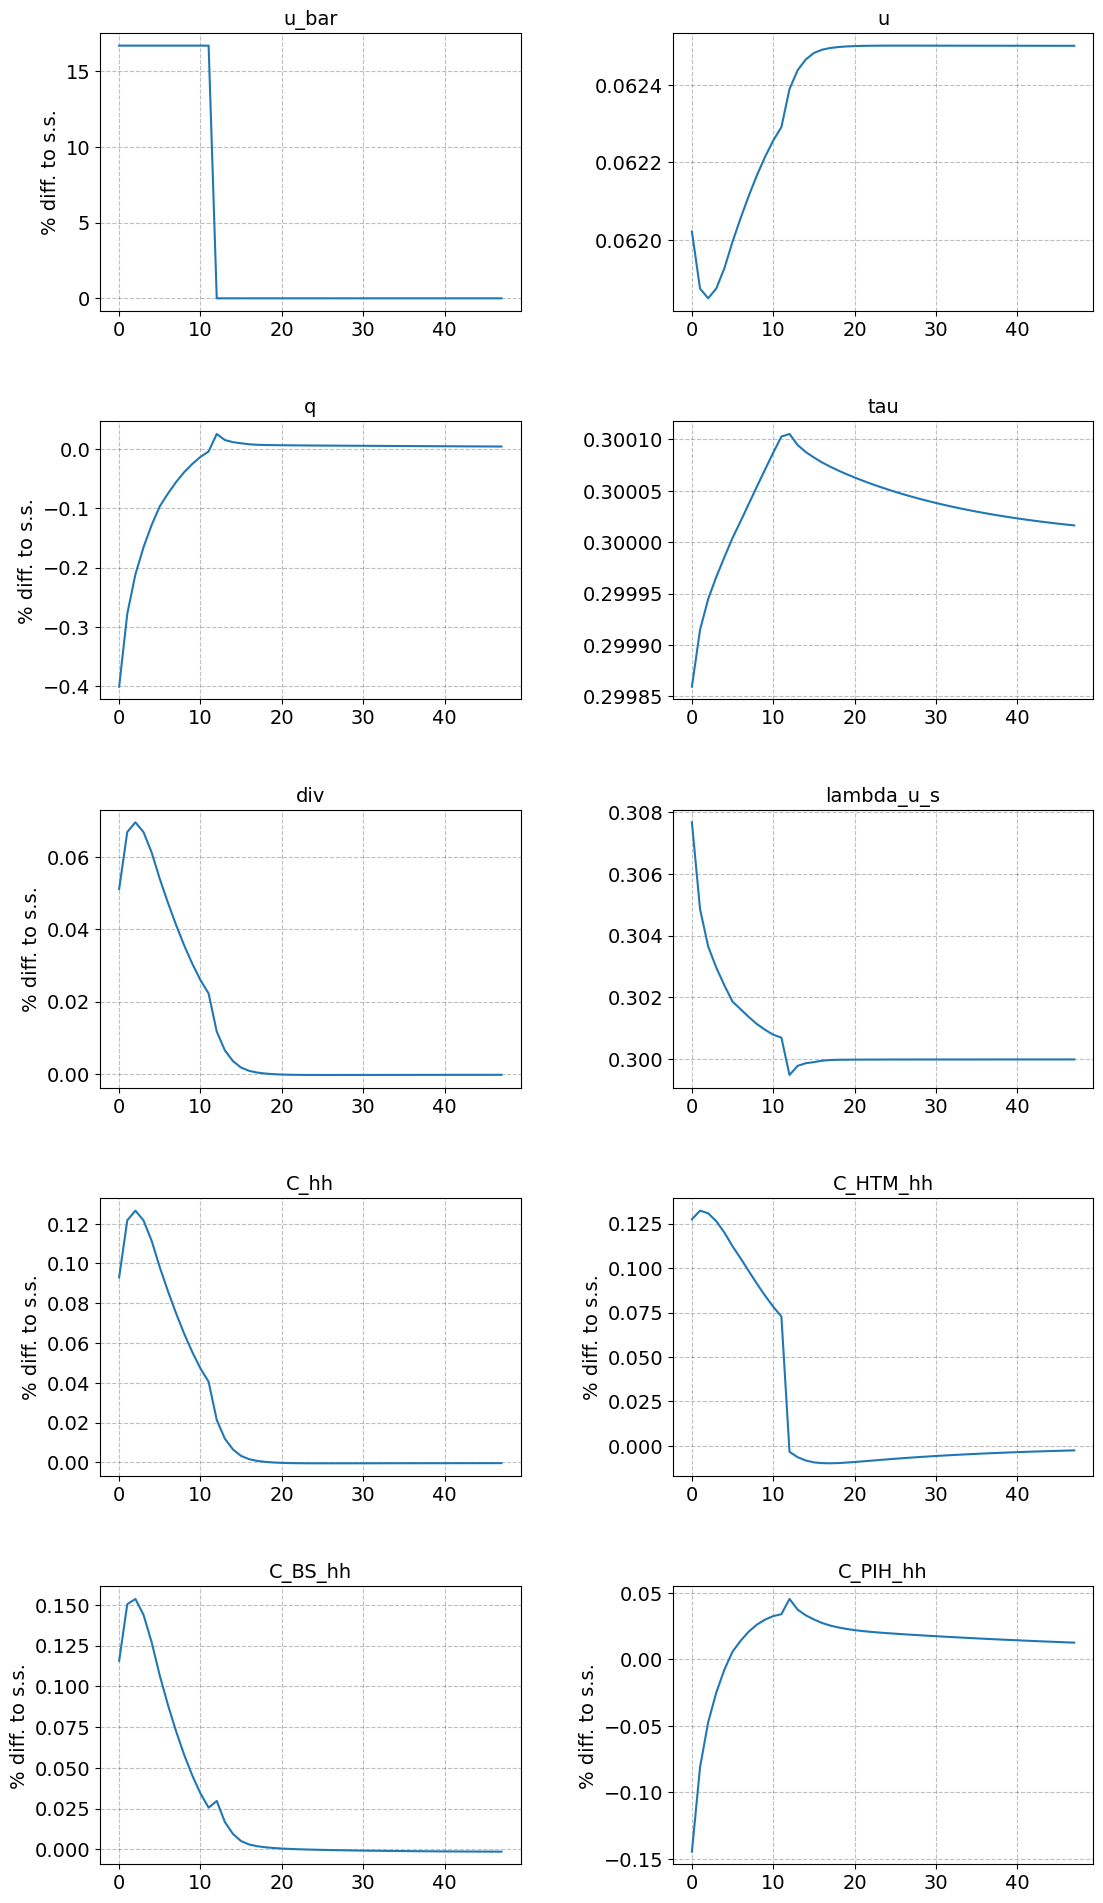

In [47]:
model_u_bar.show_IRFs(varnames_UI,
                      lvl_value=lvl_value,
                      T_max=48,do_shocks=False,do_targets=False,ncols=2)

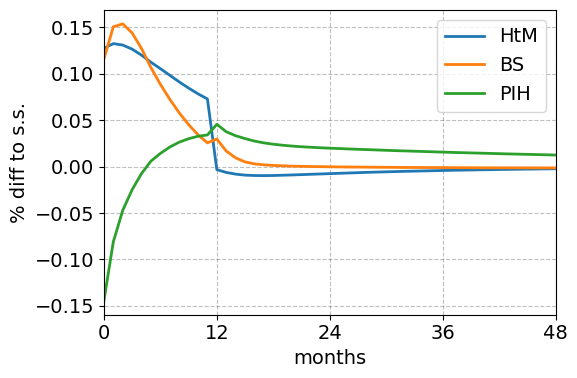

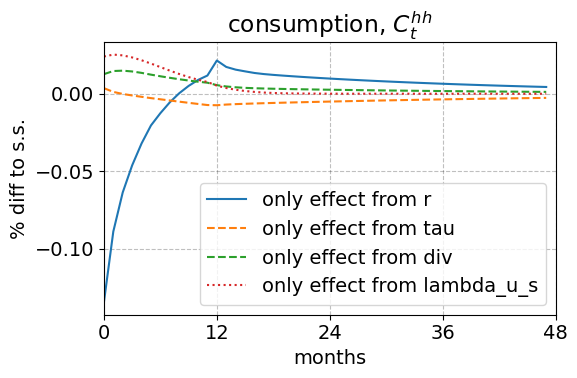

In [48]:
plot_C_hh_types(model_u_bar)
plot_C_hh_decomposition(model_u_bar,skip_all=True)

### 5.3. <a id='toc5_3_'></a>[c) Fiscal multiplier of future extension](#toc0_)

In [49]:
model_u_bar_fut = model.copy()

shocks = {'du_bar':np.zeros(par.T)}
shocks['du_bar'][12:24] = np.ones(12)

model_u_bar_fut.find_transition_path(shocks=shocks,do_end_check=False)
model_u_bar_fut.calc_outcomes(do_print=True)

 qB  = 0.55
 M   = 5.19
 MPC[ 0] = 32.5
 MPC[ 1] = 2.2
 MPC[ 2] = 2.1
 MPC[12] = 1.5


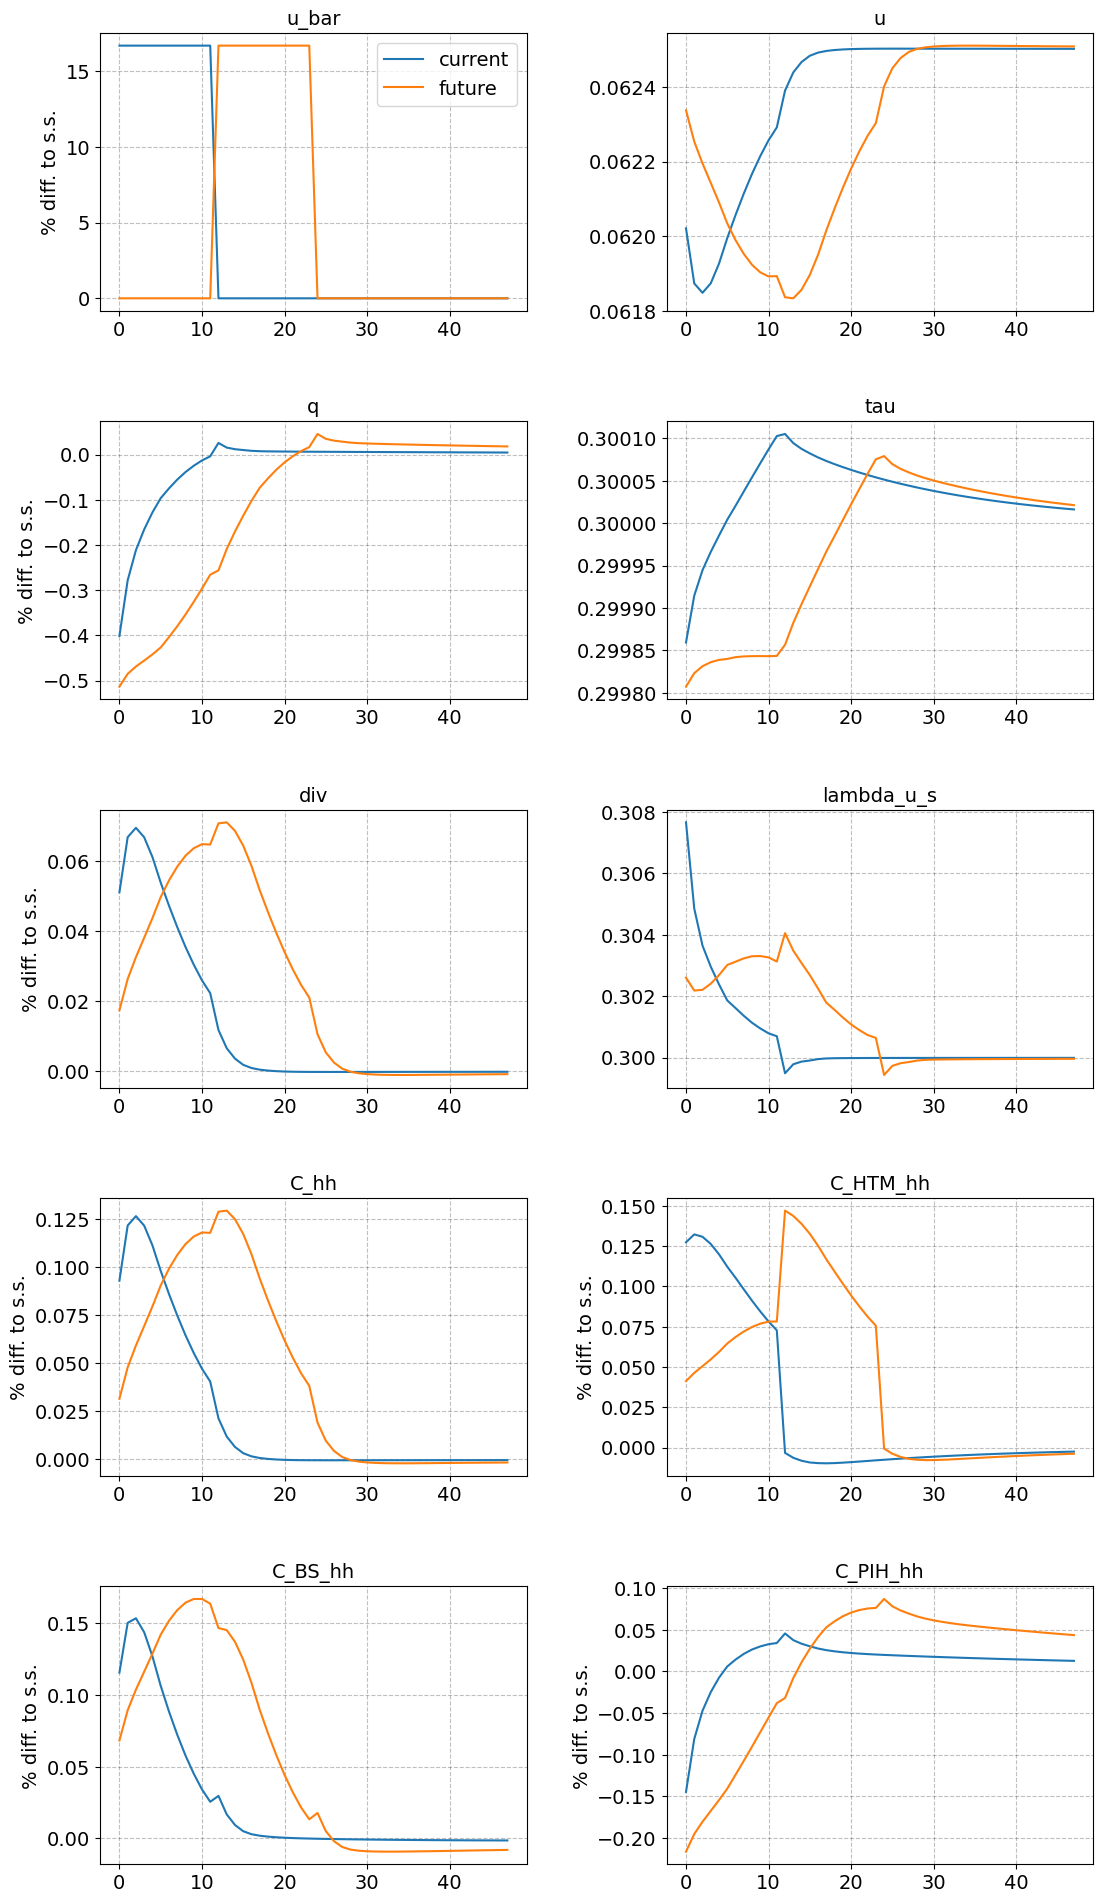

In [50]:
model_u_bar.compare_IRFs(
    models=[model_u_bar,model_u_bar_fut],
    labels=['current','future'],
    varnames=varnames_UI,
    lvl_value=lvl_value,
    T_max=48,do_shocks=False,do_targets=False,ncols=2)

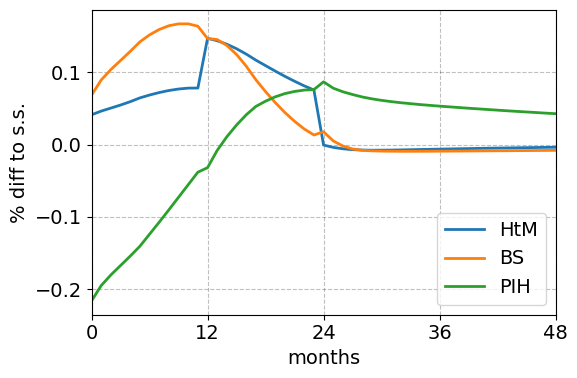

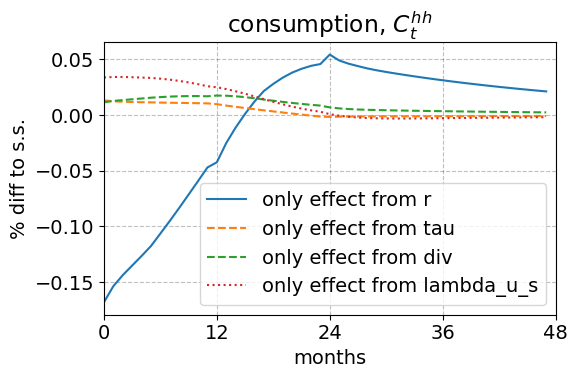

In [51]:
plot_C_hh_types(model_u_bar_fut)
plot_C_hh_decomposition(model_u_bar_fut,skip_all=True)

### 5.4. <a id='toc5_4_'></a>[d) Fiscal multiplier of future extension cancelled ex post](#toc0_)

In [52]:
ini = {}
for k,v in ss.__dict__.items():
    if np.isscalar(v):
        ini[k] = model_u_bar_fut.path.__dict__[k][5,0]
    else:
        ini[k] = model_u_bar_fut.path.__dict__[k][5]

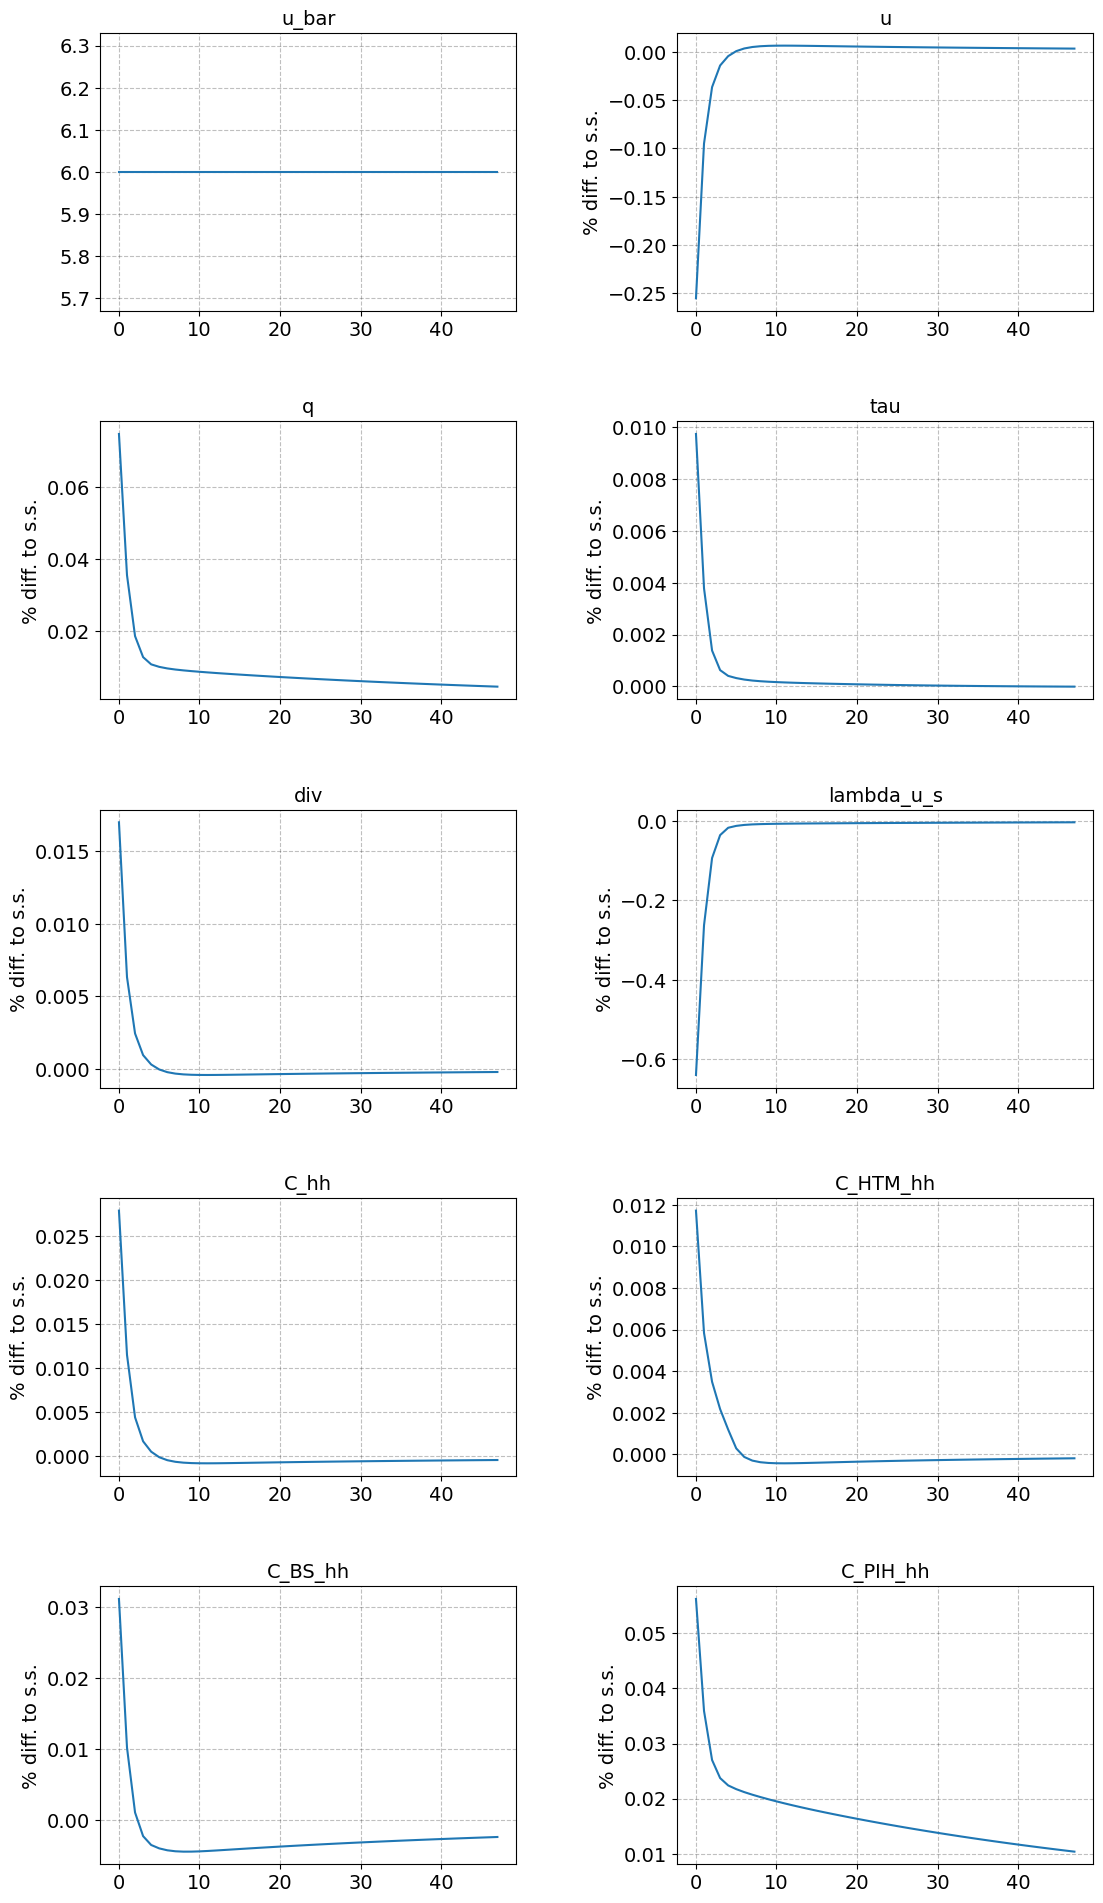

In [53]:
model_u_bar_fut_can = model.copy()
model_u_bar_fut_can.find_transition_path(shocks=[],ini=ini,do_end_check=False)
model_u_bar_fut_can.show_IRFs(varnames_UI,
                              lvl_value=['u_bar'],
                              T_max=48,do_shocks=False,do_targets=False,ncols=2)

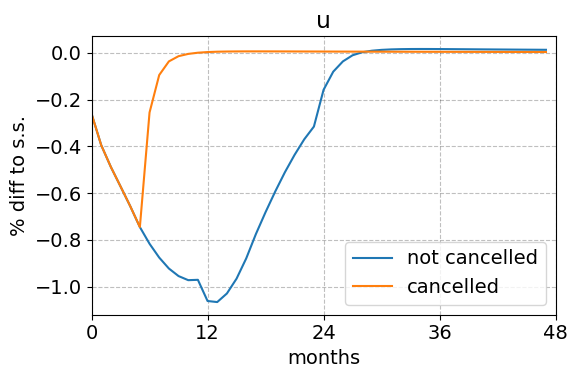

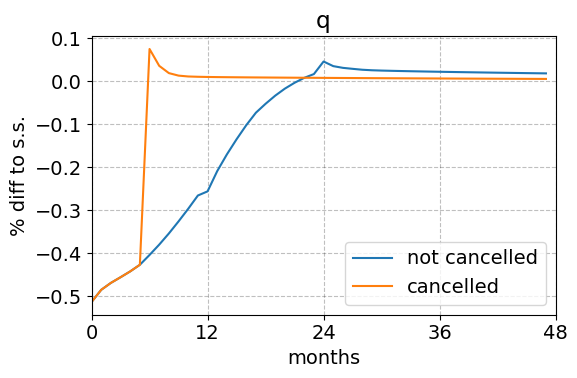

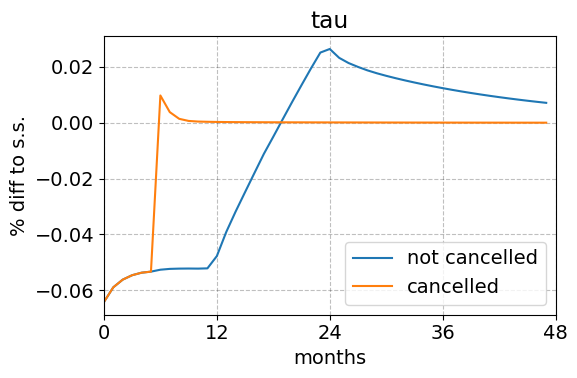

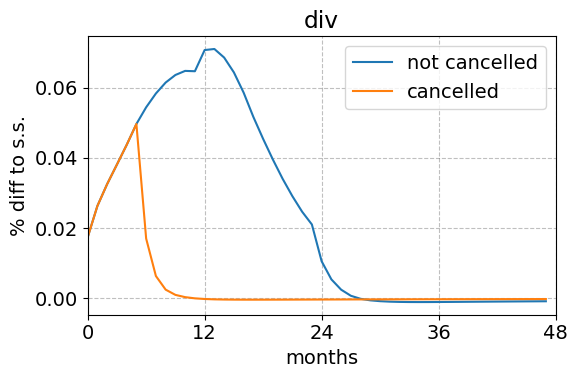

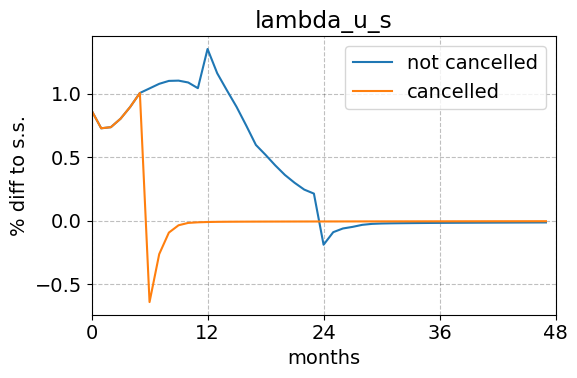

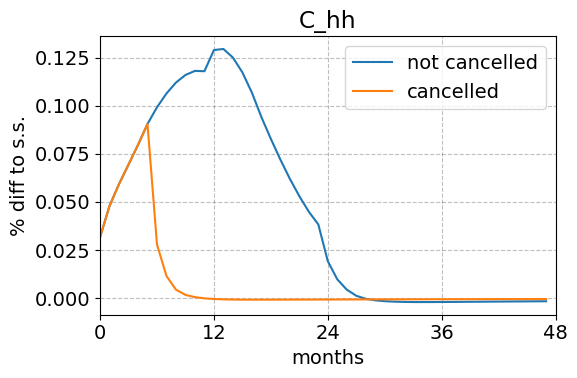

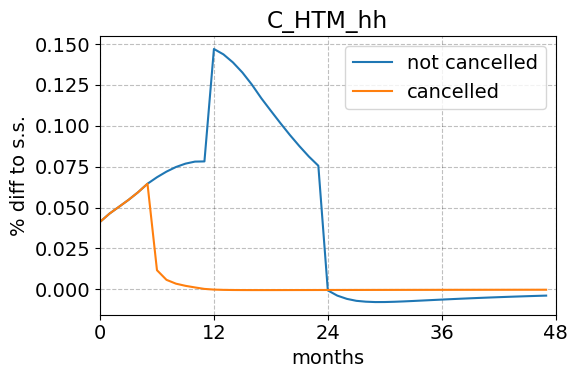

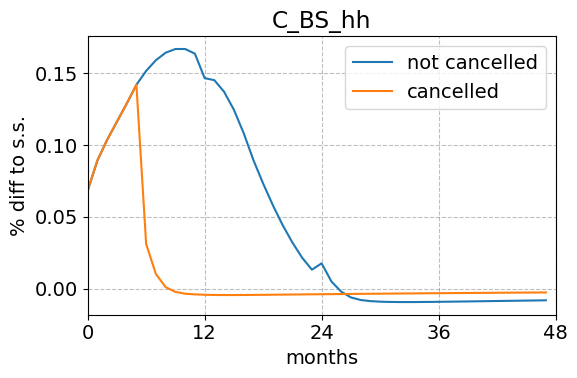

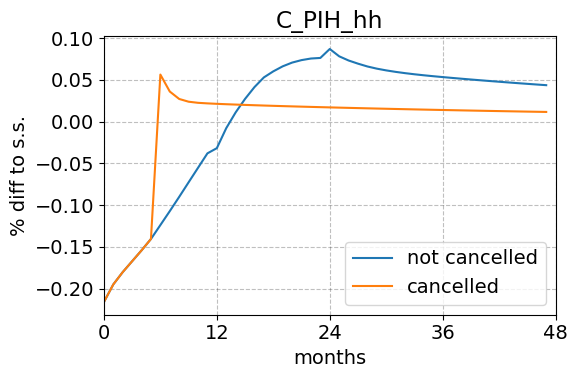

In [54]:
for varname in varnames_UI:
    
    if varname in ['u_bar']: continue

    ssvalue = model_u_bar_fut.ss.__dict__[varname]
    pathvalue = model_u_bar_fut.path.__dict__[varname]
    pathvalue_can = model_u_bar_fut_can.path.__dict__[varname]
    y = np.vstack([pathvalue[:6],pathvalue_can])

    fig,ax = create_fig(figsize=(6,6/1.5))
    ax.set_title(varname)
    ax.plot(np.arange(48),(pathvalue[:48]/ssvalue-1)*100,label='not cancelled')
    ax.plot(np.arange(48),(y[:48]/ssvalue-1)*100,label='cancelled')
    format_fig(fig,ax,ylabel='% diff to s.s.',T_max=48,legend=True)

In [55]:
Y = np.vstack([model_u_bar_fut.path.Y[:6],model_u_bar_fut_can.path.Y])

taxes = np.vstack([model_u_bar_fut.path.taxes[:6],model_u_bar_fut_can.path.taxes])
nom = np.sum([(Y[t]-ss.Y)/(1+ss.r)**t for t in range(par.T)])
denom = np.sum([(taxes[t]-ss.taxes)/(1+ss.r)**t for t in range(par.T)])

M = nom/denom
print(f'{M = :.2f}')

M = -3.74
